In [87]:
import matplotlib.pyplot as plt 
from math import *
import numpy as np 
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, Math, Latex


In [88]:
#Gaussian Function

In [89]:
%%latex
$$F(x) =\frac{1}{{\sigma \sqrt {2\pi } }}e^{{ - \left( {x - \mu } \right)^2}/{2\sigma^2} }$$

<IPython.core.display.Latex object>

In [90]:
%%writefile gaussian.py

def gaussian_function(mean,variance,variable):
     return 1.0 / sqrt(2.0 * pi *variance)*exp(-0.5 * (variable-mean) ** 2 / variance)

Overwriting gaussian.py


In [91]:
# %load gaussian.py

def gaussian_function(mean,variance,variable):
     return 1.0 / sqrt(2.0 * pi *variance)*exp(-0.5 * (variable-mean) ** 2 / variance)


In [94]:
def update(mean1, variance1, mean2, variance2):
    
    update_mean = (variance2*mean1 + variance1*mean2)/(variance2+variance1)
    update_variance = 1/(1/variance2 + 1/variance1)
    
    return [update_mean, update_variance]


def predict(mean1, variance1, mean2, variance2):
    
    predict_mean = mean1 + mean2
    predict_variance = variance1 + variance2
    
    return [predict_mean, predict_variance]

In [85]:
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

measurement_variance = 4.
motion_variance = 2.
mean = 0.
variance = 10000.


for n in range(len(measurements)):
    mean,variance = update(mean, variance, measurements[n], measurement_variance)
    print('Update: [{}, {}]'.format(mean, variance))
    # motion update, with uncertainty
    mean, variance = predict(mean, variance, motions[n], motion_variance)
    print('Predict: [{}, {}]'.format(mean, variance))

    

Update: [4.998000799680128, 3.9984006397441023]
Predict: [5.998000799680128, 5.998400639744102]
Update: [5.999200191953932, 2.399744061425258]
Predict: [6.999200191953932, 4.399744061425258]
Update: [6.999619127420922, 2.0951800575117594]
Predict: [8.999619127420921, 4.09518005751176]
Update: [8.999811802788143, 2.0235152416216957]
Predict: [9.999811802788143, 4.023515241621696]
Update: [9.999906177177365, 2.0058615808441944]
Predict: [10.999906177177365, 4.005861580844194]


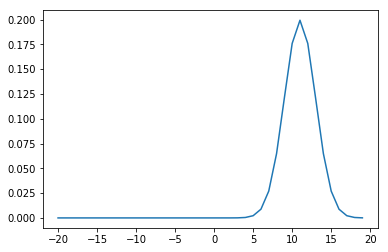

In [95]:
final_mean = mean 
final_variance = variance 
variables = np.arange(-20,20,1)

gaussian_values=[]

for x in variables:
    gaussian_values.append(gaussian_function(final_mean,final_variance,x))
    
    
plt.plot(variables, gaussian_values)    